<a href="https://colab.research.google.com/github/ruthin1912/machinelearning/blob/main/20125_week_9_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [ ]:
y = df['salary_more_then_100k']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [ ]:
X = inputs.drop(['company','job','degree'],axis='columns')

In [ ]:
X

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model test accuracy score with criterion gini index: 0.8333


In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
print('Model train accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model train accuracy score with criterion gini index: 1.0000


[Text(0.5, 0.875, 'X[0] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(0.3, 0.625, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.375, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.625, 'X[0] <= 1.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

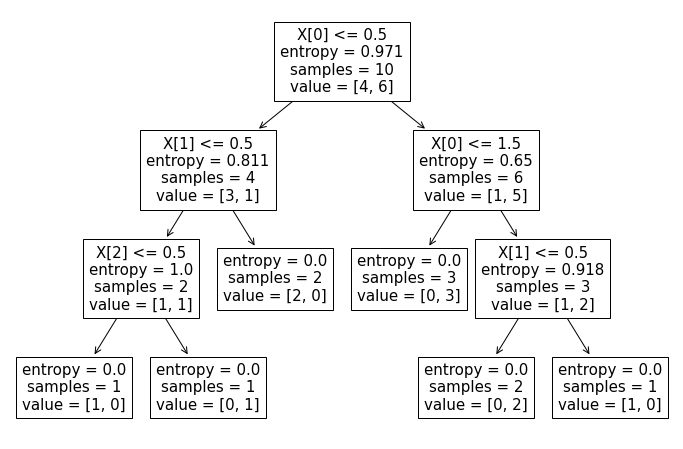

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(X_train, y_train)) 